In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("pizza sales.csv")

In [3]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [5]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [6]:
df.sample(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
5457,5458,2411,calabrese_m,1,2/10/2015,11:53:29,16.25,16.25,M,Supreme,"慛duja Salami, Pancetta, Tomatoes, Red Onions, ...",The Calabrese Pizza
42586,42587,18730,thai_ckn_l,1,11/16/2015,11:45:01,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
20247,20248,8898,classic_dlx_m,1,5/29/2015,20:52:57,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
37188,37189,16418,southw_ckn_l,1,10/3/2015,19:04:35,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
915,916,399,bbq_ckn_m,1,1/7/2015,15:47:49,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

#### Missing Values

In [10]:
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [11]:
df.describe(include='all')

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,NaN,big_meat_s,NaN,11/26/2015,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN
50%,24310.500000,10682.500000,NaN,1.000000,NaN,NaN,16.500000,16.500000,NaN,NaN,NaN,NaN
75%,36465.250000,16100.000000,NaN,1.000000,NaN,NaN,20.250000,20.500000,NaN,NaN,NaN,NaN


In [12]:
print("The length of the dataset is", df.shape)

The length of the dataset is (48620, 12)


#### Explore categorical columns

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n--- Unique Values in {col} ---")
    print(df[col].unique())
    print(f"\n--- Value Counts for {col} ---")
    print(df[col].value_counts())


--- Unique Values in pizza_id ---
['hawaiian_m' 'classic_dlx_m' 'five_cheese_l' 'ital_supr_l' 'mexicana_m'
 'thai_ckn_l' 'ital_supr_m' 'prsc_argla_l' 'bbq_ckn_s' 'the_greek_s'
 'spinach_supr_s' 'classic_dlx_s' 'green_garden_s' 'ital_cpcllo_l'
 'ital_supr_s' 'mexicana_s' 'spicy_ital_l' 'spin_pesto_l' 'veggie_veg_s'
 'mexicana_l' 'southw_ckn_l' 'bbq_ckn_l' 'cali_ckn_l' 'cali_ckn_m'
 'pepperoni_l' 'cali_ckn_s' 'ckn_pesto_l' 'big_meat_s' 'soppressata_l'
 'four_cheese_l' 'napolitana_s' 'calabrese_m' 'four_cheese_m'
 'ital_veggie_s' 'mediterraneo_m' 'peppr_salami_s' 'spinach_fet_l'
 'napolitana_l' 'sicilian_l' 'ital_cpcllo_m' 'southw_ckn_s' 'bbq_ckn_m'
 'pepperoni_m' 'prsc_argla_s' 'sicilian_m' 'veggie_veg_l' 'ckn_alfredo_s'
 'pepperoni_s' 'green_garden_l' 'green_garden_m' 'pep_msh_pep_l'
 'hawaiian_s' 'peppr_salami_m' 'ckn_alfredo_m' 'peppr_salami_l'
 'spin_pesto_s' 'thai_ckn_m' 'classic_dlx_l' 'ckn_pesto_m' 'the_greek_xl'
 'hawaiian_l' 'pep_msh_pep_s' 'spinach_supr_m' 'prsc_argla_m'
 'med

#### 3. Data Preparation

In [16]:
def prepare_data(df):
    """
    Prepares the data for machine learning.  This includes:
    - Handling missing values
    - Converting data types
    - Feature engineering (date/time features)
    - One-hot encoding categorical variables
    - Feature Scaling

    Args:
        df (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: The prepared DataFrame, or None if input is None.
    """
    if df is None:
        return None

    df = df.copy()

#### Handling Missing Values
Imputing missing values using SimpleImputer

In [18]:
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [19]:
if len(numeric_cols) > 0:
    imputer_numeric = SimpleImputer(strategy='mean')
    df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

In [20]:
if len(categorical_cols) > 0:
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

In [21]:
print("\nMissing values handled.")


Missing values handled.


#### Convert Data Types

In [23]:
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed', dayfirst=True)
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.time

#### Feature Engineering

In [25]:
df['day_of_week'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month
df['hour'] = [t.hour for t in df['order_time']]

#### One-Hot Encode Categorical Variables

In [27]:
categorical_cols_to_encode = ['pizza_size', 'pizza_category', 'pizza_name', 'day_of_week']  # Include day_of_week
df_prepared = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True) #drop_first to handle multicollinearity

In [28]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,hour
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,1,11
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,1,11
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,1,11
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,1,11
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,1,11


#### Drop original categorical columns and other unneeded columns

In [30]:
columns_to_drop = ['order_id', 'pizza_id', 'order_time', 'pizza_ingredients']
df_prepared = df_prepared.drop(columns=columns_to_drop, errors='ignore') # Use errors='ignore'

In [31]:
print("Data preparation complete.")

Data preparation complete.


In [32]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,hour
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,1,11
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,1,11
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,1,11
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,1,11
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,1,11


#### 4. Exploratory Data Analysis (EDA)

In [34]:
def explore_data(df):
    """
    Performs exploratory data analysis and visualizes key patterns.

    Args:
        df (pandas.DataFrame): The input DataFrame.
    """
    if df is None:
        return

    print("\n--- Exploratory Data Analysis ---")

#### Sales Trends Over Time

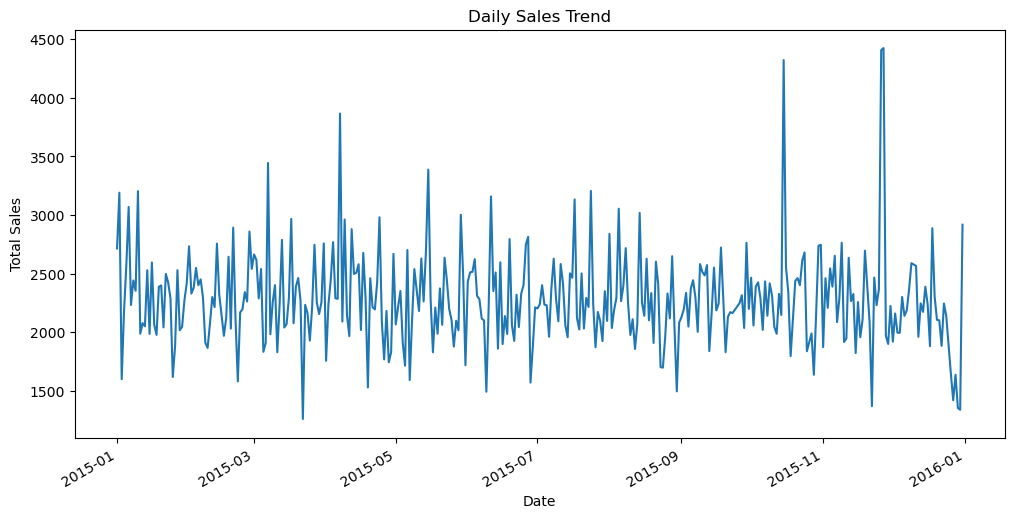

In [36]:
plt.figure(figsize=(12, 6))
df_temp = df.copy()
df_temp['order_date'] = pd.to_datetime(df_temp['order_date'], format='mixed', dayfirst=True)
daily_sales = df_temp.groupby('order_date')['total_price'].sum()
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

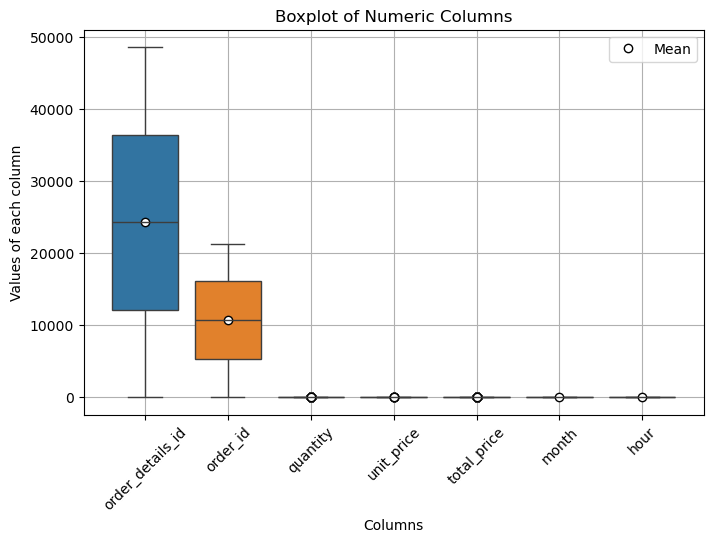

In [50]:
# Display the distribution of data based on the quartiles and potential outliers.
plt.figure(figsize=(8, 5))  # Set figure size
ax = sns.boxplot(data=df[numeric_columns.columns])
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values of each column')
plt.grid(True)

# Calculate and plot the mean
mean_values = df[numeric_columns.columns].mean().values
plt.plot(range(len(mean_values)), mean_values, marker='o', markerfacecolor='white', markersize=6, markeredgecolor='black', linestyle='', label='Mean')

plt.legend()  # Show legend for mean marker
plt.show()

In [51]:
# Detect outliers using IQR (Interquartile Range)
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total_price'] < Q1 - 1.5 * IQR) | (df['total_price'] > Q3 + 1.5 * IQR)]

#to show all outliers
outliers

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,hour,timestamp
16336,16337.0,7188.0,five_cheese_l,2.0,2015-01-05,12:58:03,18.50,37.0,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Monday,1,12,2015-01-05 12:58:03
16406,16407.0,7223.0,ckn_pesto_m,2.0,2015-01-05,19:10:03,16.75,33.5,M,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",The Chicken Pesto Pizza,Monday,1,19,2015-01-05 19:10:03
20574,20575.0,9037.0,spicy_ital_s,3.0,2015-01-06,12:18:44,12.50,37.5,S,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza,Tuesday,1,12,2015-01-06 12:18:44
20589,20590.0,9042.0,mexicana_l,2.0,2015-01-06,12:55:58,20.25,40.5,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Tuesday,1,12,2015-01-06 12:55:58
24600,24601.0,10813.0,thai_ckn_l,2.0,2015-01-07,13:33:35,20.75,41.5,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,Wednesday,1,13,2015-01-07 13:33:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48396,48397.0,21251.0,four_cheese_l,2.0,2015-12-30,12:45:20,17.95,35.9,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,Wednesday,12,12,2015-12-30 12:45:20
48417,48418.0,21260.0,prsc_argla_m,2.0,2015-12-30,15:45:32,16.50,33.0,M,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza,Wednesday,12,15,2015-12-30 15:45:32
48466,48467.0,21288.0,classic_dlx_m,3.0,2015-12-31,13:04:18,16.00,48.0,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,12,13,2015-12-31 13:04:18
48575,48576.0,21331.0,bbq_ckn_l,2.0,2015-12-31,19:05:04,20.75,41.5,L,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,Thursday,12,19,2015-12-31 19:05:04
